In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [90]:
df = pd.read_csv("../../Data/03.통합.csv", index_col=0)
df.columns

Index(['시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액'],
      dtype='object')

In [91]:
df_all = df[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', \
       '예금은행대출금액', '예금액']]
df_all.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,
2013,1821303,112129,286,739619,49143,248468.3,13718.5
2013,1620640,84066,395,469392,48097,462443.1,532689.2
2013,423864,29504,65,190166,12612,57288.6,6703.3
2013,496161,25831,82,160821,13902,77411.6,59554.5
2013,363224,19340,86,136309,9981,46578.5,37541.7


---
## 전체 k-means

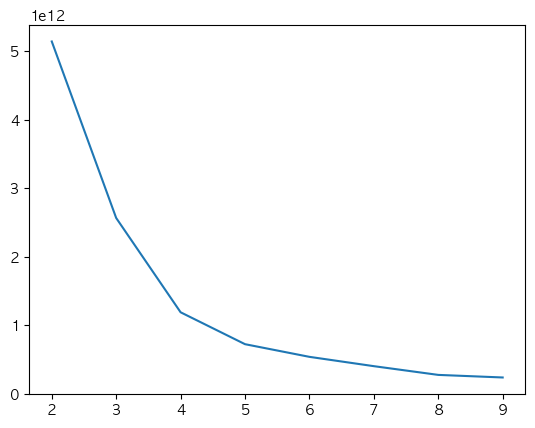

In [92]:
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(df_all)
    scores.append(km.inertia_)
    
plt.plot(range(2, 10), scores)
plt.show()

In [108]:
data_points = df_all.values
kmeans = KMeans(n_clusters=5).fit(data_points) #n_clusters: 5분류
df_all['cluster_id'] = kmeans.labels_
df['cluster_id'] = kmeans.labels_

df_all.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id,cluster_scale
년도,,,,,,,,,
2013,1821303,112129,286,739619,49143,248468.3,13718.5,1,0.25
2013,1620640,84066,395,469392,48097,462443.1,532689.2,2,0.75
2013,423864,29504,65,190166,12612,57288.6,6703.3,3,1.00
2013,496161,25831,82,160821,13902,77411.6,59554.5,3,1.00
2013,363224,19340,86,136309,9981,46578.5,37541.7,3,1.00


In [97]:
df_all.cluster_id
df_all.columns

Index(['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액',
       'cluster_id'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split

data = df_all[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']]
label = df_all['cluster_scale']

train_input, test_input, train_target, test_target = \
    train_test_split(data, label)

In [103]:
# # MinMaxScaler
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler

# x =df_all['cluster_id'].values
# x =x.reshape(1, -1)
# x.astype(float)
# data = df_all['cluster_id'].values.reshape(-1, 1)
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data)

# df_all['cluster_scale'] = scaled_data
# print(scaled_data)

[[0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.5 ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]
 [1.  ]
 [1.  ]


In [106]:
# 1열로 구성된 배열로 만들기
train_input = train_input.values.reshape(-1, 1) #(-1,1): 행은 있는 거 다 쓰고 열은 하나 만든다. 
test_input = test_input.values.reshape(-1, 1)

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

ValueError: Found input variables with inconsistent numbers of samples: [714, 102]

In [102]:
df_all.columns

Index(['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액',
       'cluster_id'],
      dtype='object')

In [ ]:
# feature, target
data = df_all[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_all['cluster_scale'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print("Train score:", lr.score(train_input, train_target))
print("Test score:", lr.score(test_input, test_target))

Train score: 0.286966321110938
Test score: 0.13549449552748938


In [ ]:
lr.predict([[1821303, 112129, 286, 739619, 49143, 248468.3, 13718.5]])

array([-0.12624066])

In [109]:
df[df['시도'] == '경기도']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,1
2014,경기도,12357830,1834379,112169,277,732307,51661,268494.6,14808.7,1
2015,경기도,12522606,1898312,113495,273,733359,49285,284496.7,15664.1,1
2016,경기도,12716780,1824976,105643,269,727380,52487,305720.4,22669.9,1
2017,경기도,12873895,1772162,94088,269,733941,52606,326152.3,23775.3,1
2018,경기도,13077153,1871621,88175,268,752499,49364,350553.6,23680.4,1
2019,경기도,13239666,1806296,83198,264,769744,52700,376464.3,25501.3,1
2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,1


In [110]:
df[df['시도'] == '서울특별시']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,2
2014,서울특별시,10103233,1661425,83711,392,457517,50223,494441.9,565416.1,2
2015,서울특별시,10022181,1726687,83005,389,450675,44599,525529.1,600391.1,2
2016,서울특별시,9930616,1655859,75536,388,436121,44997,544592.1,628071.1,2
2017,서울특별시,9857426,1571423,65389,388,428333,44574,569688.0,664687.0,2
2018,서울특별시,9765623,1549937,58074,394,424800,41812,607389.3,728762.8,2
2019,서울특별시,9729107,1476081,53673,391,422293,42897,641634.1,791160.6,2
2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,2


In [111]:
df[df['시도'] == '부산광역시']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,3
2014,부산광역시,3519401,500802,26190,77,155754,14569,84345.8,67846.8,3
2015,부산광역시,3513777,520591,26645,74,154283,13133,92109.5,73156.4,3
2016,부산광역시,3498529,480407,24906,70,151207,13686,99122.7,79929.2,3
2017,부산광역시,3470653,467471,21480,65,150863,13900,106819.1,81765.8,3
2018,부산광역시,3441453,442854,19152,65,152775,12472,113616.7,80983.6,3
2019,부산광역시,3413841,435058,17049,67,155589,13569,120127.2,90142.9,3
2020,부산광역시,3391946,506176,15058,67,153527,14454,132190.5,101058.8,3


In [112]:
df[df['시도'] == '강원도']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,강원도,1542263,214931,10980,34,83187,5355,13259.9,14145.8,4
2014,강원도,1544442,226284,10662,32,80458,5432,14184.7,15124.3,4
2015,강원도,1549507,222352,10929,33,78414,5570,15464.9,16285.4,4
2016,강원도,1550806,221592,10058,29,76772,5631,16415.4,17522.2,4
2017,강원도,1550142,209618,8958,30,75722,5690,17587.6,18707.2,4
2018,강원도,1543052,220252,8351,31,75412,4866,19200.5,19412.9,4
2019,강원도,1541502,215965,8283,32,75617,5238,20991.4,21582.6,4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,4


In [113]:
df[df['시도'] == '전라남도']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,전라남도,1907172,246635,15401,24,99206,6356,15968.2,24216.2,4
2014,전라남도,1905780,260874,14817,23,95720,6799,17164.0,25822.9,4
2015,전라남도,1908996,246168,15061,22,94368,6819,19216.7,28207.6,4
2016,전라남도,1903914,237337,13980,22,92981,7205,20060.0,30487.5,4
2017,전라남도,1896424,230551,12354,21,93233,7308,21010.3,30995.6,4
2018,전라남도,1882970,232414,11238,19,94134,6157,22228.8,32334.2,4
2019,전라남도,1868745,233271,10832,19,94952,6796,23785.6,34777.2,4
2020,전라남도,1851549,248770,9738,18,92405,6948,26806.6,36756.8,4


In [114]:
df[df['시도'] == '전라북도']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,전라북도,1872965,260395,14555,52,105135,6935,22597.6,15924.7,4
2014,전라북도,1871560,276900,14231,54,101860,7545,24625.9,17303.3,4
2015,전라북도,1869711,264662,14087,53,100260,7183,26242.4,19700.1,4
2016,전라북도,1864791,252607,12698,52,97895,7233,27330.1,20112.5,4
2017,전라북도,1854607,239253,11348,50,97383,7109,28323.0,20753.7,4
2018,전라북도,1836832,257097,10001,50,97606,6490,29107.6,22167.1,4
2019,전라북도,1818917,241523,8971,50,97731,6946,30488.3,23693.8,4
2020,전라북도,1804104,257577,8165,48,94661,6953,33132.0,25070.1,4


In [115]:
df[df['시도'] == '경상남도']

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
년도,,,,,,,,,,
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,3
2014,경상남도,3350257,456164,29763,64,186973,12751,62681.3,7638.4,3
2015,경상남도,3364702,450279,29537,66,187075,11822,68619.5,8886.4,3
2016,경상남도,3373871,410180,27138,64,185325,12066,72333.0,9587.6,3
2017,경상남도,3380404,409200,23849,64,186619,12473,74494.8,9896.2,3
2018,경상남도,3373988,395524,21224,59,191016,11003,76526.6,9305.7,3
2019,경상남도,3362553,405561,19250,58,194606,11406,78235.3,9847.4,3
2020,경상남도,3340216,419997,16823,59,190849,12160,82937.6,10308.9,3
